<center><h2>Midterm - Data Science option</h2></center>

This is one of two options for the midterm. 

This option is in-depth analysis of online shopping behavior.  

We are asking you to do intensive analysis of consumer behavioral data.

The data
----

The dataset is from "Online Shoppers Purchasing Intention Dataset Data Set" https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

The data is in the file "online_shoppers_intention.csv". 

- The dataset consists of 10 numerical and 8 categorical variables.
- The 'Revenue' variable can be used as the target label. This variable is imbalanced, such that 84.5% of user journeys did NOT result in a purchase (Revenue=False)
- "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 
- The values of these features are derived from the URL information of the pages visited by the user and updated when a user takes an action, e.g. moving from one page to another. 
- The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
- The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
- The value of "Exit Rate" feature for a specific web page is calculated as for all page views to the page and it represents the percentage that the page was seen in the last session. 
- The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
- The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day or Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 
- The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a boolean value indicating whether the date of the visit is weekend, and month of the year.

The tasks
-----

Perform the following tasks:

1. Task 1 - Build a highly predictive classification model. Train the model on data entries corresponding to the months of June-Dec, and test the model on data entries corresponding to Feb-March. (50 points)

    1. Fit a logistic regression and at least one other classification model. Find and explain important features. 
    1. Report and interpret the most meaningful classifications metrics
    1. Show and explain the hyper-parameter fitting process.

    Point breakdown:
    
    - (10 points) Basic exploratory data analysis (EDA) 
        - Appropriate univariate descriptive statistics and figures
        - Appropriate bivariate descriptive statistics and figures
    - ( 5 points) Advanced EDA
        - Free-response, shows us what they know! 
    - ( 5 points) Train/test split
    - (10 points) Feature selection
    - (15 points) Model fitting
    - ( 5 points) Performance points 
        - F1 score is in the top quartile among all students 


2.  Task 2: Generate user-behavior clusters based on the purchasing behavior data for the complete dataset.  (25 points).

    1. How many clusters do you see? What are the significant differences between the various clusters in terms of the size of the clusters and purchase ratio. Perform as detailed analysis of the clusters as you can.
    2. Return plots and cluster images generated for the data.
    3. Perform a detailed analysis for each cluster corresponding to the variations in features and identify some behaviors corresponding to each particular cluster (e.g,. which cluster represent new shoppers vs. brand conscious shoppers etc.).
    
    Point breakdown:
    
    - (15 points) Clustering code
    - (10 points) Clustering analysis

3. Task 3: Consider you have training data (with the 'Revenue' attribute) for records from June-Sept only. For all records from Oct-Dec, the 'Revenue' attribute is missing. Build a semi-supervised self-labeling model to estimate 'Revenue' for the missing records in Oct-Dec and then fit your classifier. Report classification performance on Feb-March data set with and without the self-labeled data. (15 points)

    1. If you do not consider the records from Oct-Dec, generate the classification performance on test data
    2. After using the self-labeled data and training data together, does the classification performance on test data improve? Discuss which metrics are most important for your conclusion.

    Point breakdown:
    
    - ( 2 points) Correctly splits the data by month into labeled, unlabeled, and test 
    - (8 points) Generate labels for unlabeled samples with a self labeling technique
    - (5 points) Compare and contrast performance difference on test dataset between labels only and labels & self-labels.

-----

Remaining points breakdown:
 - (10 points) Style and clarity
     - Please attempt to write clear, well-commented code and explanations in markdown cells, where appropriate. 

------

Your deliverables:

- Code in a single .ipynb notebook.
- Comments where appropriate.
- Figures, graphs, and tables where appropriate.
- Text explanations (in markdown cells) of what is being done and why.

__That's it. Good Luck!__

<br>
<br> 
<br>

----

### Task 1

In [399]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [400]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score
from sklearn.linear_model import LassoCV, Lasso

In [401]:
# read data file
data = pd.read_csv('/content/drive/MyDrive/FourthBrain/Week 8/online_shoppers_intention.csv')
data.shape

(12330, 18)

In [402]:
# Split data into features and target values
y = data[['Revenue']]
Y = y
x = data.drop('Revenue', axis=1)

In [403]:
x_train = x

In [404]:
# get info for each column in dataframe (find which ones are non numeric columns)
for word in x_train.columns:
  print(x_train.columns.get_loc(word), word, x_train[word].count(), x_train[word].dtype)

0 Administrative 12330 int64
1 Administrative_Duration 12330 float64
2 Informational 12330 int64
3 Informational_Duration 12330 float64
4 ProductRelated 12330 int64
5 ProductRelated_Duration 12330 float64
6 BounceRates 12330 float64
7 ExitRates 12330 float64
8 PageValues 12330 float64
9 SpecialDay 12330 float64
10 Month 12330 object
11 OperatingSystems 12330 int64
12 Browser 12330 int64
13 Region 12330 int64
14 TrafficType 12330 int64
15 VisitorType 12330 object
16 Weekend 12330 bool


### Visualize distributions of numeric features


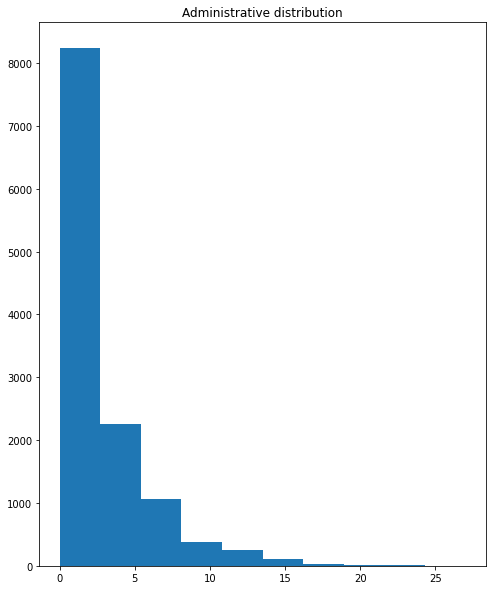

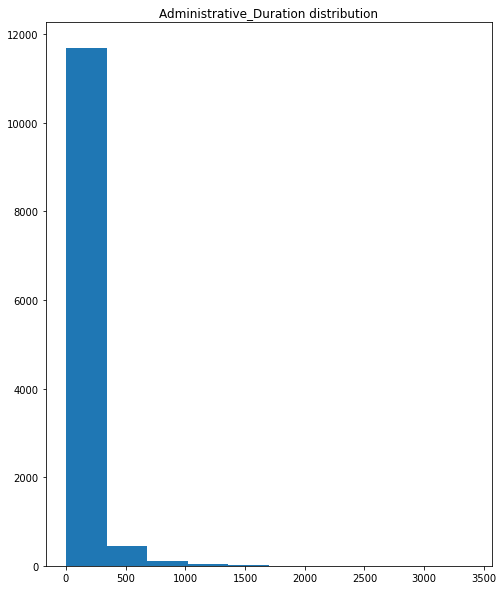

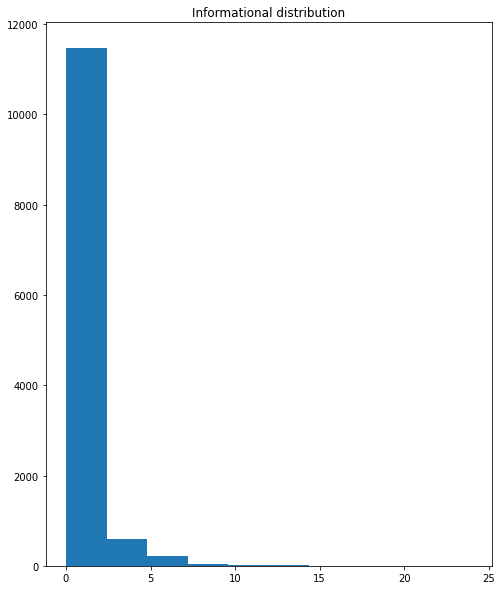

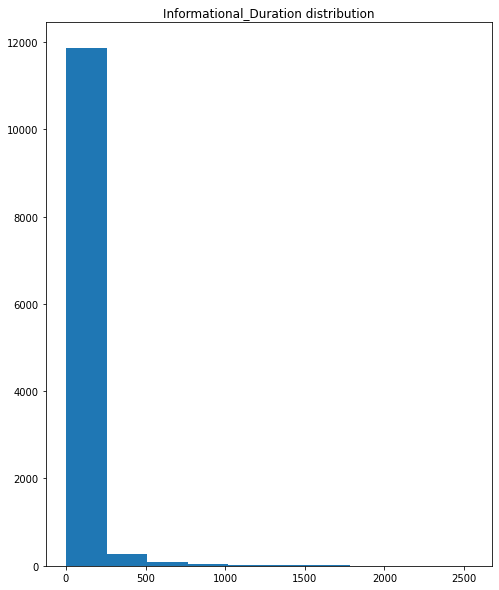

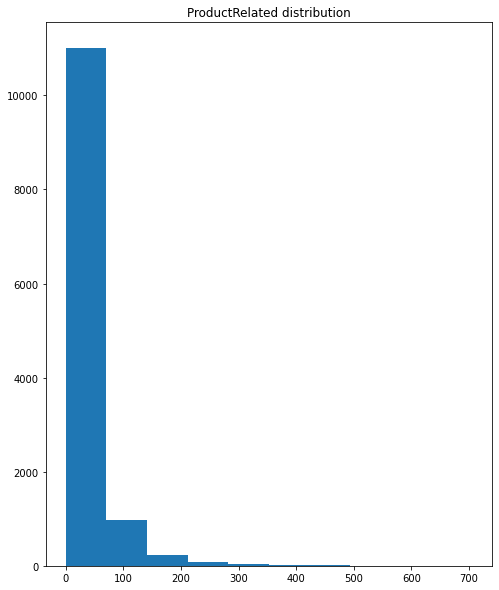

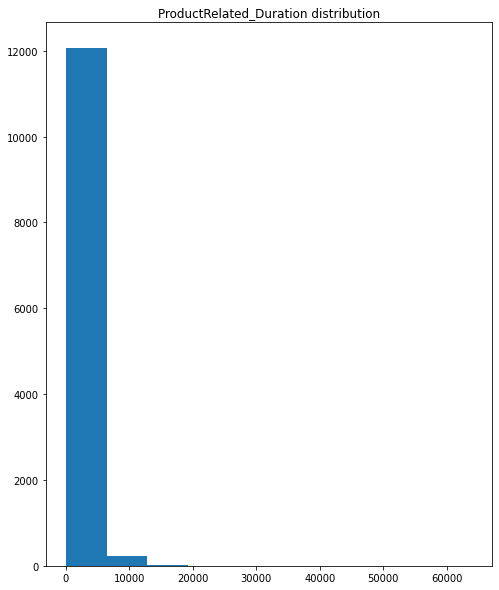

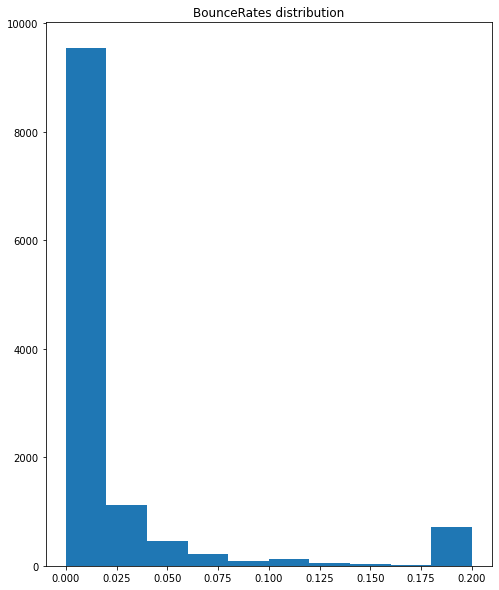

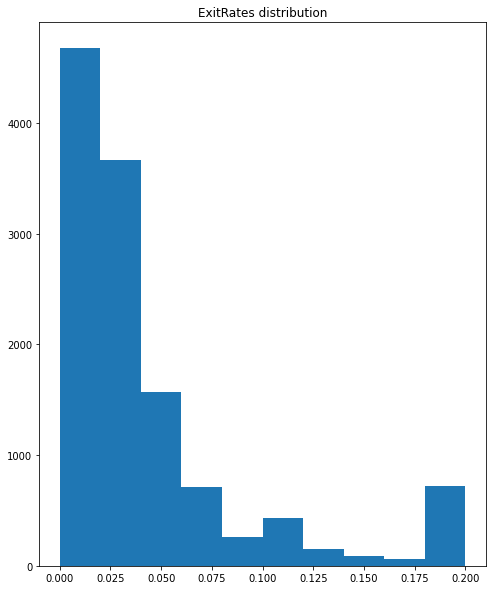

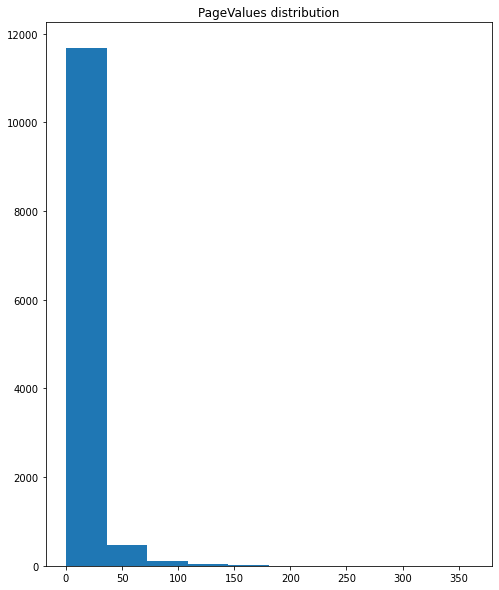

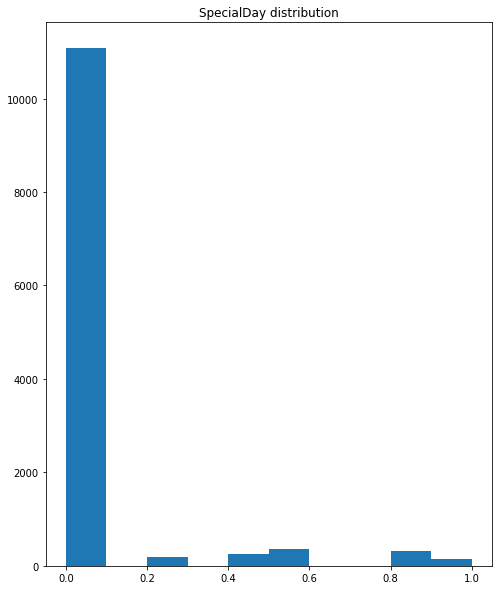

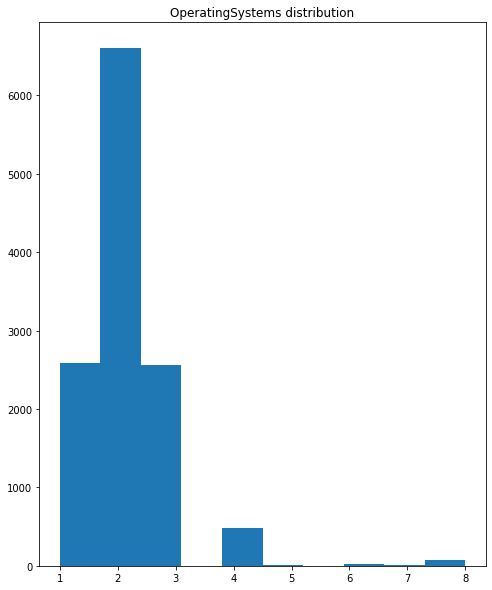

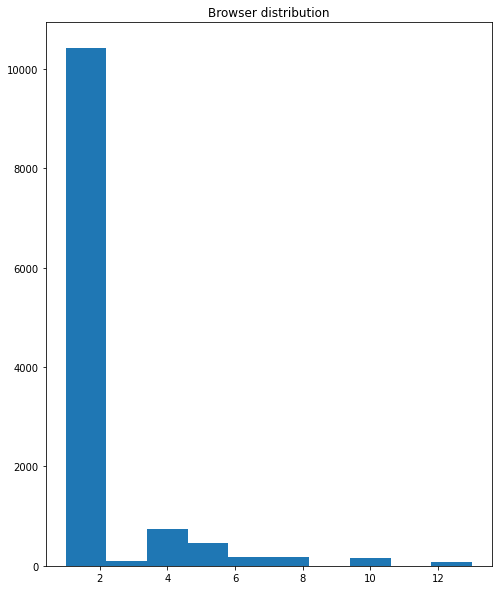

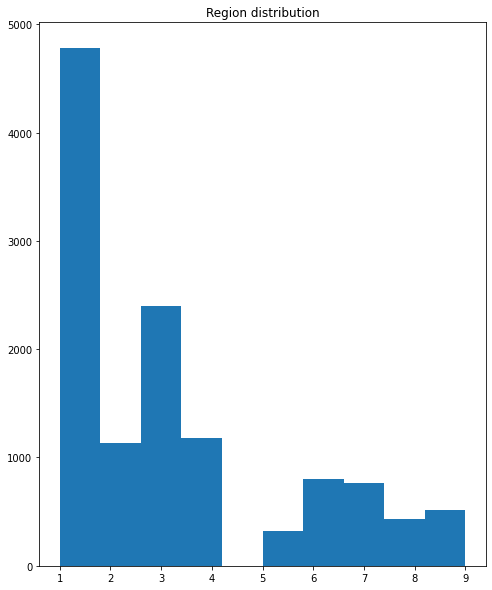

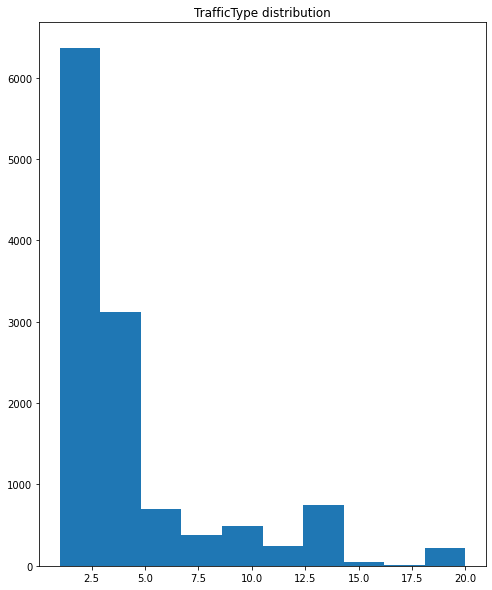

In [405]:
numeric_columns = x_train.select_dtypes(include=np.number).columns.tolist()
# Loop through the numeric columns
for col in numeric_columns:
    # Generate a histogram of the current numeric feature column
    plt.hist(x_train[col])
    plt.title(f'{col} distribution')
    plt.show()

In [406]:
# change word columns into number mapping
month_mapping = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'June':5,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
x_train['Month'] = x_train['Month'].map(month_mapping)

In [407]:
# binary map the binary columns
binary_mapping = {False: 0,True:1}
x_train['Weekend'] = x_train['Weekend'].map(binary_mapping)
y['Revenue'] = y['Revenue'].map(binary_mapping)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [408]:
# map categorical data 
categorical_columns = x_train.select_dtypes(include=object).columns.tolist()
print(categorical_columns)
encoded = pd.get_dummies(x_train[categorical_columns])
temp = x_train.drop(categorical_columns, axis=1)
x_train = pd.merge(encoded, temp,left_index=True, right_index=True)
final_x = x_train

['VisitorType']


### Visualize the correlations between features

not all features will  be meaningful to predictions

In [409]:
print(f'The training df currently has {x_train.shape[1]} features')

The training df currently has 19 features


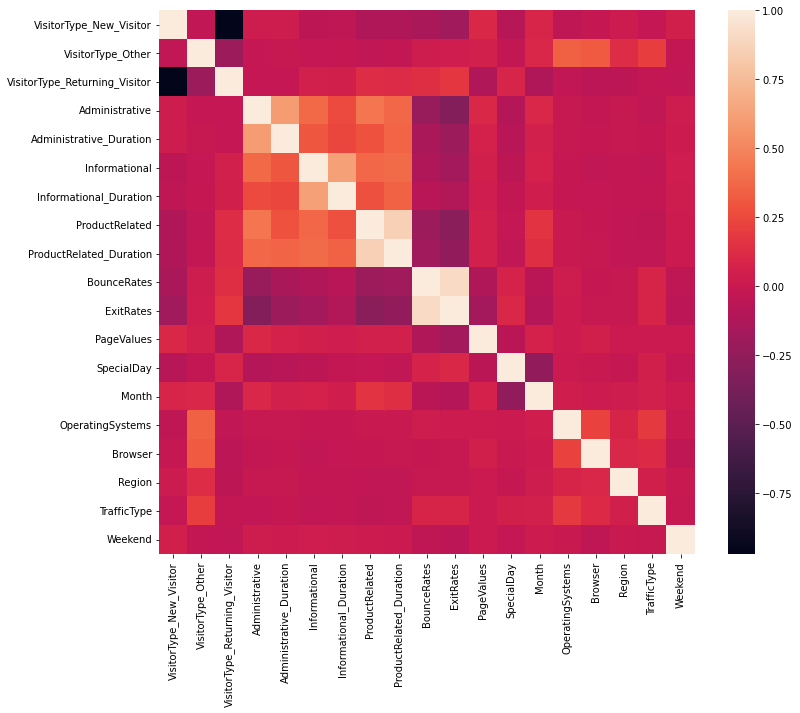

In [410]:
plt.figure(figsize=(12,10))
# Compute the Pearson Correlation of each feature in the training
cor = x_train.corr(method='pearson')
sns.heatmap(cor)
plt.show()

### Feature Selection

In [411]:
# Use for loops to determine which features to keep
keep_columns = np.full((cor.shape[0],), True, dtype=bool)
# Loop over all columns
for i in range(cor.shape[0]-1):
    # Loop over all columns to the right of the current one
    for j in range(i+1, cor.shape[0]-1):
        # If the absolute correlation between the current two columns is greater than or equal to 0.8...
        if np.abs(cor.iloc[i,j]) >= 0.8:
            # If we haven't already told the keep_columns list to drop column j...
            if keep_columns[j]:
                # Drop column j
                keep_columns[j] = False
# Extract the columns to keep from the training df
selected_columns = x_train.columns[keep_columns]
# Make a new df with the columns we've decided to keep from the training df
x_out = x_train[selected_columns]
print('The following columns are present in the new df:')
print(selected_columns)
print(f'The old df had {x_train.shape[1]} features. The new df has {x_out.shape[1]} features.')

The following columns are present in the new df:
Index(['VisitorType_New_Visitor', 'VisitorType_Other', 'Administrative',
       'Administrative_Duration', 'Informational', 'Informational_Duration',
       'ProductRelated', 'BounceRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend'],
      dtype='object')
The old df had 19 features. The new df has 16 features.


### More feature selection using P-values

In [412]:
# set selected columns to everything
selected_columns = selected_columns[0:]
import statsmodels.api as sm
def backwardElimination(x, y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.01

data_modeled, selected_columns = backwardElimination(x_out.values, y, SL, selected_columns)

In [413]:
print('The following columns remain based on p-value selection:')
print(selected_columns)
# Make a reduced df
data_red = pd.DataFrame(data = data_modeled, columns = selected_columns)
print(f'After selection by Pearson Correlation, we had {x_out.shape[1]} features.')
print(f'After selection by p-value, we have {data_red.shape[1]} features.')

The following columns remain based on p-value selection:
Index(['VisitorType_New_Visitor', 'Administrative', 'ProductRelated',
       'BounceRates', 'PageValues', 'Month'],
      dtype='object')
After selection by Pearson Correlation, we had 16 features.
After selection by p-value, we have 6 features.


In [414]:
data_red

,VisitorType_New_Visitor,Administrative,ProductRelated,BounceRates,PageValues,Month
0,0.0,0.0,1.0,0.200000,0.000000,2.0
1,0.0,0.0,2.0,0.000000,0.000000,2.0
2,0.0,0.0,1.0,0.200000,0.000000,2.0
3,0.0,0.0,2.0,0.050000,0.000000,2.0
4,0.0,0.0,10.0,0.020000,0.000000,2.0
...,...,...,...,...,...,...
12325,0.0,3.0,53.0,0.007143,12.241717,12.0
12326,0.0,0.0,5.0,0.000000,0.000000,11.0
12327,0.0,0.0,6.0,0.083333,0.000000,11.0
12328,0.0,4.0,15.0,0.000000,0.000000,11.0


### LASSO feature Importance

In [415]:
reg = LassoCV()
# Train the regressor on the reduced df
reg.fit(data_red, y.values.ravel())
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(data_red, y))
coef = pd.Series(reg.coef_, index = data_red.columns)
print(f"Lasso picked {sum(coef != 0)} features and eliminated the other {sum(coef == 0)} features")

Best alpha using built-in LassoCV: 0.003308
Best score using built-in LassoCV: 0.269684
Lasso picked 5 features and eliminated the other 1 features


Text(0.5, 1.0, 'Feature importance using Lasso Model')

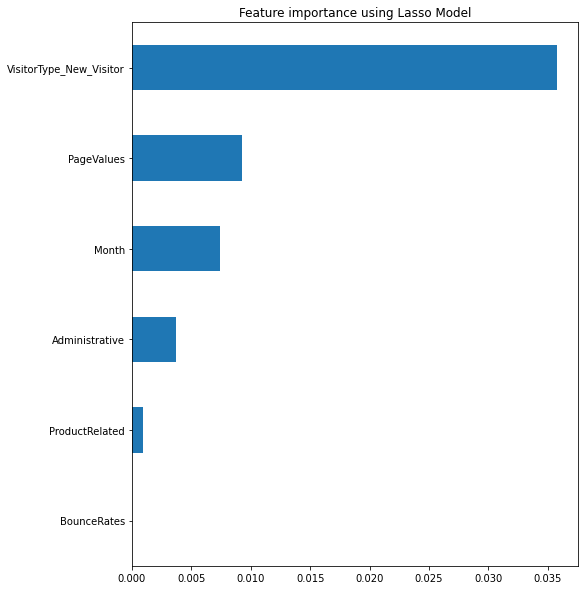

In [416]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [417]:
y = y['Revenue']

### visualize feature distributions

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

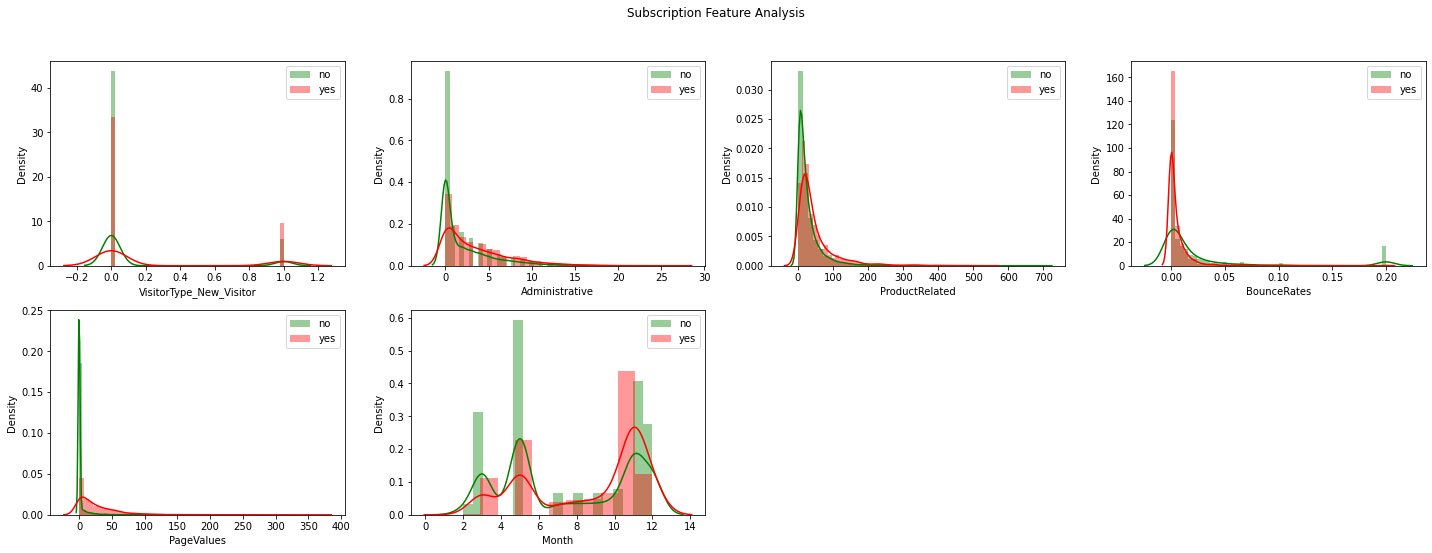

In [418]:
fig = plt.figure(figsize = (20,25))
j = 0
for i in data_red.columns:
    plt.subplot(7, 4, j+1)
    j += 1
    sns.distplot(data_red[i][y==0], color='g', label = 'no')
    sns.distplot(data_red[i][y==1], color='r', label = 'yes')
    plt.legend(loc='best')
fig.suptitle('Subscription Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

### Logistic Regression Model


In [419]:
# train = June-Dec
# test = Feb-March
result = pd.concat([data_red, y], axis=1, join="inner")
train_data = ['June', 'Jul','Aug','Sep','Oct','Nov','Dec']
test_data = ['Feb','Mar']
train = result.loc[data['Month'].isin(train_data)]
test = result.loc[data['Month'].isin(test_data)]

# split into train and test
y_train = train[['Revenue']]
x_train = train.drop('Revenue', axis=1)
y_test = test[['Revenue']]
x_test = test.drop('Revenue', axis=1)

In [420]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6875, 6), (6875, 1), (2091, 6), (2091, 1))

In [421]:
y_test = y_test['Revenue'].ravel()
y_train = y_train['Revenue'].ravel()

In [422]:
LogReg = LogisticRegression(max_iter=1000)
LogReg.fit(x_train, y_train)

prediction = LogReg.predict(x_test)
#print(prediction)
# Compute the confusion matrix between the true and predicted test targets
cm = confusion_matrix(y_test, prediction)
# Compute the model's accuracy by summing the diagonals of the confusion matrix
# (i.e. taking its trace) and dividing by the number of test samples
acc = np.trace(cm)/len(x_test)
print(f"Accuracy = {acc}")


recall_scores = recall(y_test, prediction)
precision_scores = precision(y_test, prediction)
f1_scores = f1_score(y_test, prediction)

print(f'Mean Recall = {mean(recall_scores):.3f}')
print(f'Mean Precision = {mean(precision_scores):.3f}')
print(f'Mean F1 Score = {mean(f1_scores):.3f}')
print(cm)

Accuracy = 0.9273075083692014
Mean Recall = 0.323
Mean Precision = 0.759
Mean F1 Score = 0.453
[[1876   20]
 [ 132   63]]


### Logistic Regression Model (Normalized)

In [423]:
from sklearn.preprocessing import MinMaxScaler

In [424]:
# normalize the values between 0 and 1
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(x_train)
x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

In [425]:
LogReg = LogisticRegression(max_iter=1000)
LogReg.fit(x_train_norm, y_train)

prediction = LogReg.predict(x_test_norm)

# Compute the confusion matrix between the true and predicted test targets
cm = confusion_matrix(y_test, prediction)
# Compute the model's accuracy by summing the diagonals of the confusion matrix
# (i.e. taking its trace) and dividing by the number of test samples
accuracy = np.trace(cm)/len(x_test_norm)
print(f"Accuracy = {accuracy}")
recall_scores = recall(y_test, prediction)
precision_scores = precision(y_test, prediction)
f1_scores = f1_score(y_test, prediction)

print(f'Mean Recall = {mean(recall_scores):.3f}')
print(f'Mean Precision = {mean(precision_scores):.3f}')
print(f'Mean F1 Score = {mean(f1_scores):.3f}')
print(cm)

Accuracy = 0.9225251076040172
Mean Recall = 0.221
Mean Precision = 0.811
Mean F1 Score = 0.347
[[1886   10]
 [ 152   43]]


Precision went up but accuracy went down


Model 2: TPOT classifier model

In [426]:
y_test = y_test.reshape(2091,1)
y_train = y_train.reshape(6875,1)

In [427]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6875, 6), (6875, 1), (2091, 6), (2091, 1))

In [428]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# use TPOT classifier to determine the best classification model
def return_tpot_results(x_train, y_train, x_test):  
    exported_pipeline = make_pipeline(
    RFE(estimator=ExtraTreesClassifier(criterion="entropy", max_features=0.1, n_estimators=100), step=0.15000000000000002),
    GradientBoostingClassifier(learning_rate=0.1, max_depth=9, max_features=0.35000000000000003, min_samples_leaf=19, min_samples_split=6, n_estimators=100, subsample=0.9500000000000001)
    )

    exported_pipeline.fit(x_train, y_train)
    prediction = exported_pipeline.predict(x_test)
    return prediction

pred = return_tpot_results(x_train, y_train.ravel(), x_test)

In [429]:
# TPOT confusion matrix
cmtp = confusion_matrix(y_test, pred) 
acc = np.trace(cmtp)/len(x_test)
rec  = recall(y_test, pred)
prec = precision(y_test, pred)
f1   = f1_score(y_test, pred)

print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cmtp)

Accuracy = 0.9445241511238642, Precision = 0.7046632124352331, Recall = 0.6974358974358974, F1-score = 0.7010309278350515
Confusion Matrix is:
[[1839   57]
 [  59  136]]


Much better metrics! Higher accuracy, precision, recall, and F1-score

### Task 2: Clustering

In [430]:
from sklearn.cluster import KMeans

VisitorType_New_Visitor and PageValues

In [431]:
# cluster on numeric data
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
X = data.select_dtypes(include=numerics)

In [432]:
X.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')

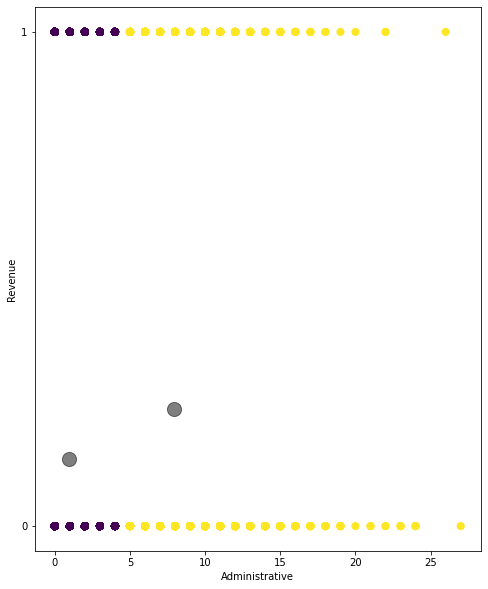

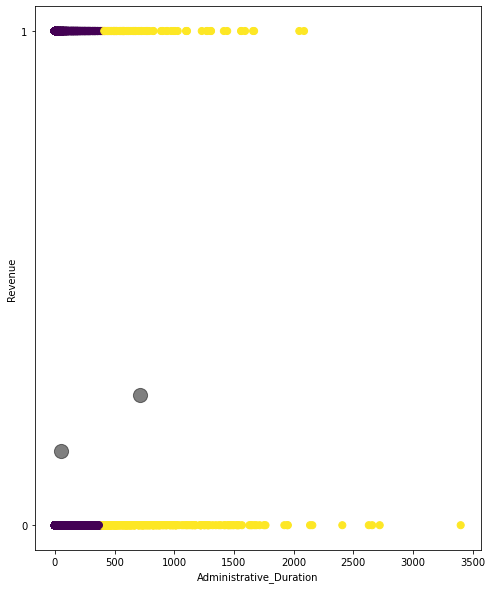

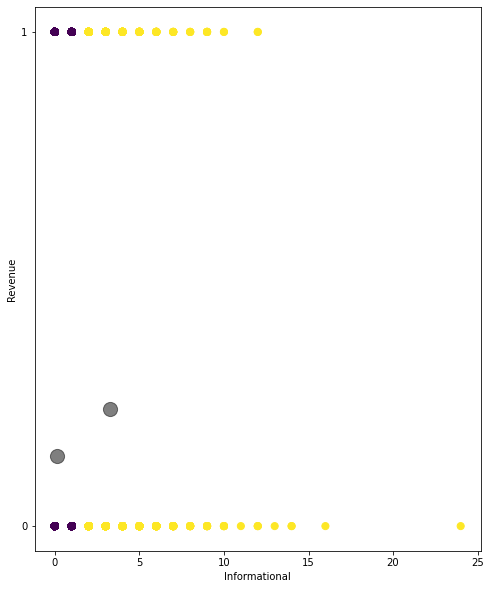

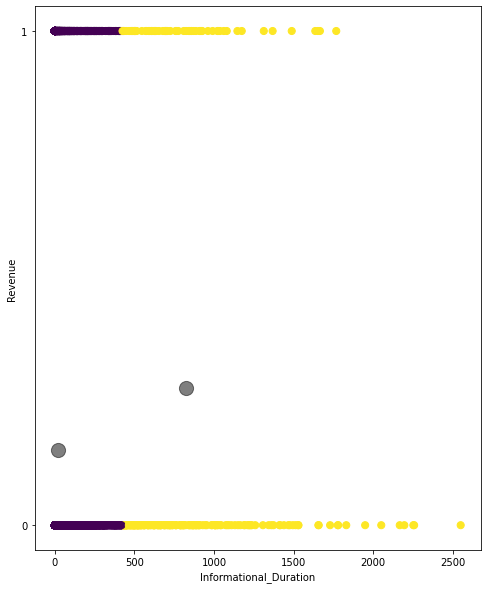

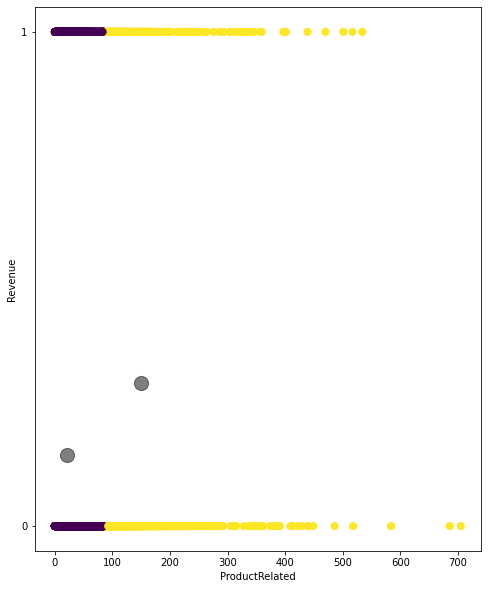

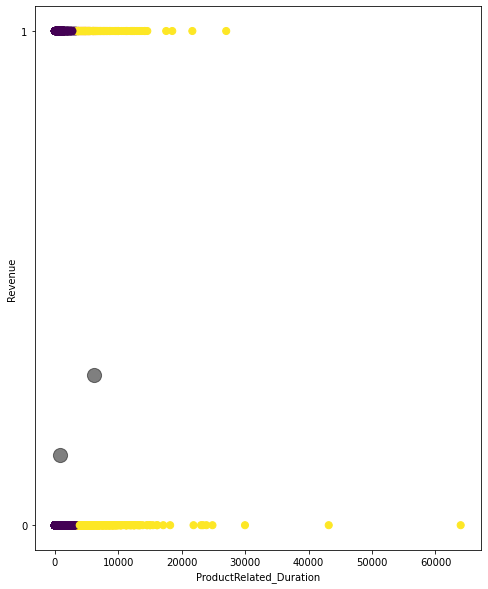

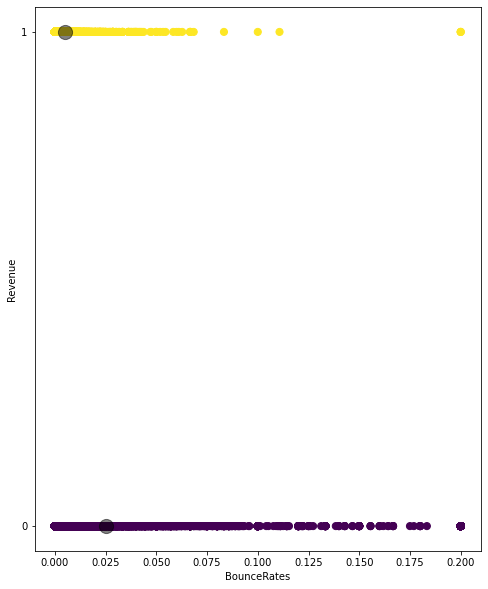

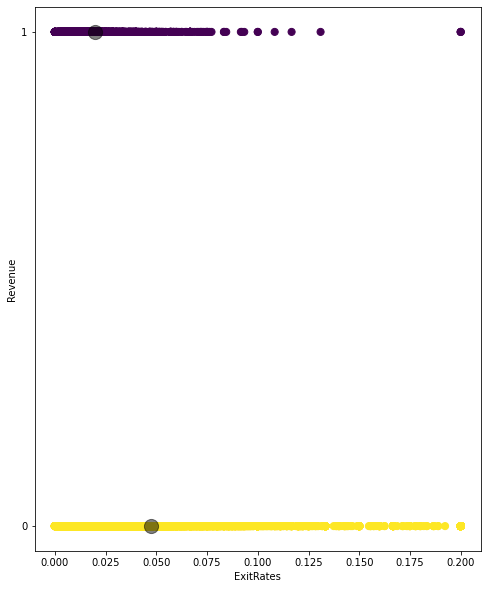

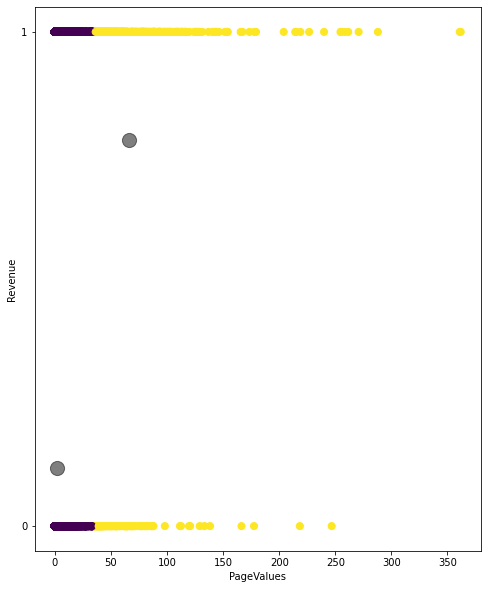

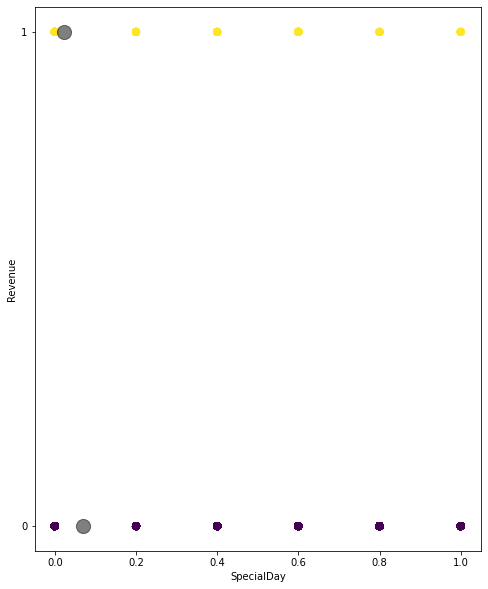

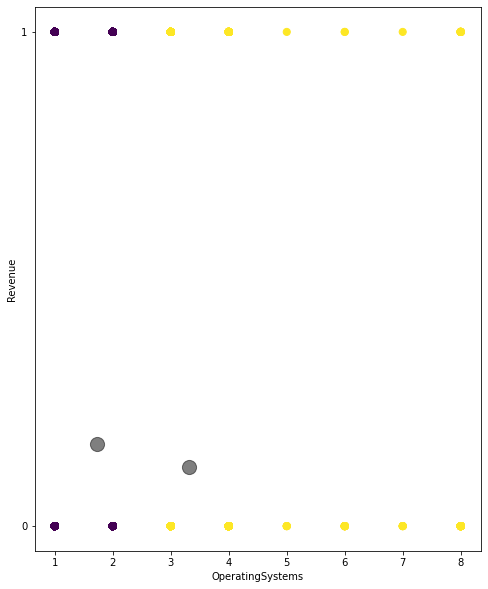

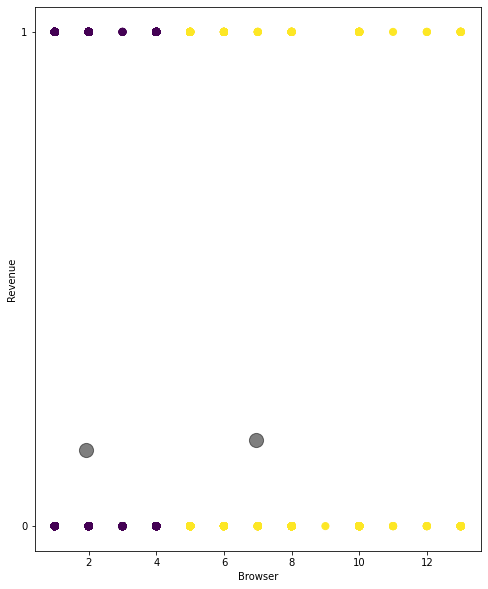

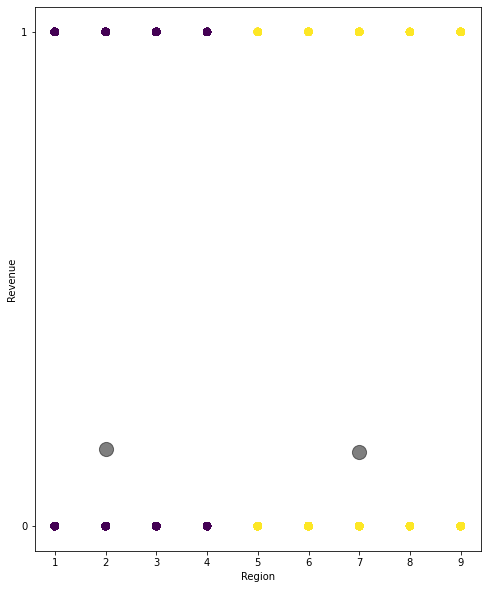

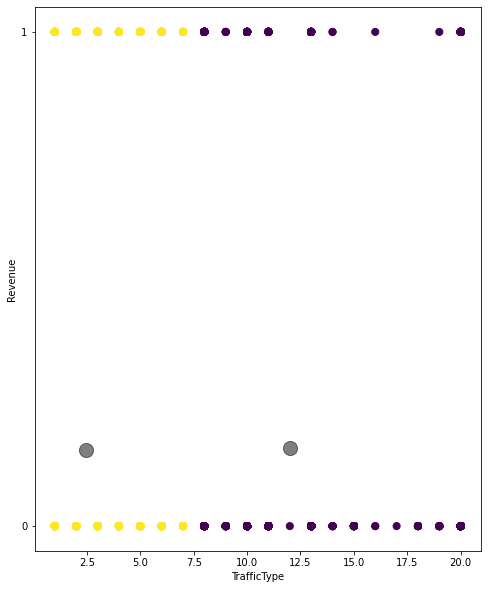

In [433]:
# iterate through each column in X and plot vs revenue
for columns in X.columns:
  kmeans = KMeans(n_clusters=2)
  kmeans.fit(pd.concat([X[columns], Y], axis = 1))
  y_kmeans = kmeans.predict(pd.concat([X[columns], Y], axis = 1))
  plt.scatter(X[columns].to_numpy(), Y.to_numpy(), c=y_kmeans, s=50, cmap='viridis')
  plt.yticks(np.arange(0, 2, 1))
  centers = kmeans.cluster_centers_
  plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
  plt.xlabel(columns)
  plt.ylabel("Revenue")
  plt.show()

seemingly no effect: Administrative, informational, SpecialDay, OperatingSystems, Browser, Region, 
			TrafficType
  
less time spent increased chance of revenue: Administrative_Duration, informational_duration,
					productRelated, productRelated_Duration, BounceRates,ExitRates

more increased chance of revenue: PageValues

### Task 3:

In [434]:
# set train, test, unlabeled data
train_data = ['June', 'Jul','Aug','Sep']
unlabeled_data = ['Oct','Nov','Dec']
test_data = ['Feb','Mar']
data['Month'].unique()


array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [435]:
train = data.loc[data['Month'].isin(train_data)]
test = data.loc[data['Month'].isin(test_data)]
unlabeled = data.loc[data['Month'].isin(unlabeled_data)]

In [436]:
def set_up_data(x_train):
  # map all non numerical values and one hot encode other values
  binary_mapping = {False: 0,True:1}
  x_train['Weekend'] = x_train['Weekend'].map(binary_mapping)
  x_train['Revenue'] = x_train['Revenue'].map(binary_mapping)
  month_mapping = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'June':5,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
  x_train['Month'] = x_train['Month'].map(month_mapping)

  categorical_columns = x_train.select_dtypes(include=object).columns.tolist()
  encoded = pd.get_dummies(x_train[categorical_columns])
  temp = x_train.drop(categorical_columns, axis=1)
  x_train = pd.merge(encoded, temp,left_index=True, right_index=True)
  
  return x_train

In [437]:
train = set_up_data(train)
test = set_up_data(test)
unlabeled = set_up_data(unlabeled)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [438]:
# split data into train and test and unlabeled

y_train = train[['Revenue']]
x_train = train.drop('Revenue', axis=1)

y_test = test[['Revenue']]
x_test = test.drop('Revenue', axis=1)
x_test['VisitorType_Other'] = 0

y_unlabeled = unlabeled[['Revenue']]
x_unlabeled = unlabeled.drop('Revenue', axis=1)

In [439]:
X = np.concatenate((x_train, x_unlabeled), axis=0)
print(X.shape[0])

6875


In [440]:
y = np.concatenate((y_train, -1*np.ones((x_unlabeled.shape[0],1))), axis=0)

In [441]:
from sklearn.semi_supervised import LabelSpreading

recall_scores = []
n_neighbors = [2,3,5,7,9,11]
params = dict()

for i in n_neighbors:
  model = LabelSpreading(kernel='knn',alpha=0.01, n_neighbors=i)
  model.fit(X, y)
  pred = model.predict(X)
  rec = recall(y, pred, average='weighted')
  params[rec] = i
best_recall_score = max(params.keys())
params['n_neighbors'] = params[best_recall_score]

print(f"best_recall: {best_recall_score:.4f}, best n_neighbors: {params['n_neighbors']}") # best score was with n_neighbors = 3

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A col

best_recall: 0.2164, best n_neighbors: 3


Create model based on best n_neigbors value

In [442]:
model = LabelSpreading(kernel='knn',alpha=0.01, n_neighbors=3)
model.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


LabelSpreading(alpha=0.01, gamma=20, kernel='knn', max_iter=30, n_jobs=None,
               n_neighbors=3, tol=0.001)

In [443]:
pred = model.transduction_[1601:]

In [444]:
# compute metrics for Label predictions
cm   = confusion_matrix(y_unlabeled, pred)
acc = np.trace(cm)/len(x_unlabeled)
rec  = recall(y_unlabeled, pred)
prec = precision(y_unlabeled, pred)
f1   = f1_score(y_unlabeled, pred)

print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cm)

Accuracy = 0.7885855138414866, Precision = 0.476, Recall = 0.21814848762603117, F1-score = 0.29918290383406665
Confusion Matrix is:
[[3921  262]
 [ 853  238]]


### Test classifier performance on test data without predicted values

use previous tpot function

In [445]:
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

In [446]:
x_test.shape, y_test.shape, x_train.shape, y_train.shape

((2091, 19), (2091, 1), (1601, 19), (1601, 1))

In [447]:
# use previously created function
pred_one = return_tpot_results(X, y.ravel(), x_test)

In [448]:
cm   = confusion_matrix(y_test, pred_one)
acc = np.trace(cm)/len(x_test)
rec  = recall(y_test, pred_one)
prec = precision(y_test, pred_one)
f1   = f1_score(y_test, pred_one)

print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cm)

Accuracy = 0.9048302247728359, Precision = 0.0, Recall = 0.0, F1-score = 0.0
Confusion Matrix is:
[[1892    4]
 [ 195    0]]


### With Predicted Values 

In [449]:
pred = pred.reshape(5274,1)
pred.shape

(5274, 1)

In [450]:
# combine predicted labels with y_train
y = np.concatenate((y_train, pred), axis=0)

In [451]:
pred_two = return_tpot_results(X, y.ravel(), x_test)

In [452]:
cm   = confusion_matrix(y_test, pred_two)
acc = np.trace(cm)/len(x_test)
rec  = recall(y_test, pred_two)
prec = precision(y_test, pred_two)
f1   = f1_score(y_test, pred_two)

print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cm)

Accuracy = 0.9067431850789096, Precision = 0.0, Recall = 0.0, F1-score = 0.0
Confusion Matrix is:
[[1896    0]
 [ 195    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Accuracy went up